In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score

In [4]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv(r"C:\Users\pshee\Desktop\sem 7\ML LAB\labset\Ml_programs_dataset\dataset\spam.csv",encoding="latin1")

In [8]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
data=data[['v1','v2']]

In [16]:
data=data.rename(columns={'v1':'label','v2':'text'})


In [17]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
x=data.text
y=data.label

In [20]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [21]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [26]:
class_distribution=data.label.value_counts()


In [27]:
class_distribution

label
ham     4825
spam     747
Name: count, dtype: int64

Text(0.5, 1.0, 'classification of spam and ham(not spam messages)')

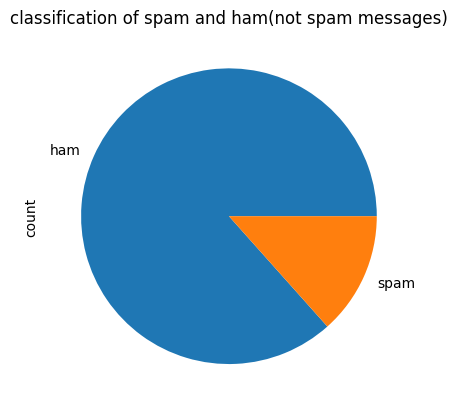

In [32]:
class_distribution.plot(kind="pie")
plt.title("classification of spam and ham(not spam messages)")


In [31]:
plt.show()

In [33]:
vectorizer=CountVectorizer()

In [34]:
xtrainvec=vectorizer.fit_transform(x_train)
xtestvec=vectorizer.transform(x_test)

In [35]:
mnb=MultinomialNB(alpha=0.8)

In [36]:
mnb.fit(xtrainvec,y_train)

MultinomialNB(alpha=0.8)

In [37]:
mnbypred=mnb.predict(xtestvec)


In [38]:
mnbypred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [39]:
print("accuracy score:\n", accuracy_score(mnbypred,y_test))

accuracy score:
 0.9826555023923444


In [41]:
print("f1 score:\n", f1_score(mnbypred,y_test,pos_label="spam"))

f1 score:
 0.9320843091334895


In [45]:
gnb=GaussianNB()
gnb.fit(xtrainvec.toarray(),y_train)

GaussianNB()

In [46]:
gnbypred=gnb.predict(xtestvec.toarray())

In [47]:
gnbypred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [48]:
print("accuracy score:\n", accuracy_score(gnbypred,y_test))

accuracy score:
 0.9120813397129187


In [49]:
print("f1 score:\n", f1_score(gnbypred,y_test,pos_label="spam"))


f1 score:
 0.7312614259597806
